<a href="https://colab.research.google.com/github/AKAS1012/Face_Detection/blob/master/Face_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/Mydrive/Ind Work/AI crash course/Lecture-slide/Face recognition using Python/Code/"

[Errno 2] No such file or directory: '/content/gdrive/Mydrive/Ind Work/AI crash course/Lecture-slide/Face recognition using Python/Code/'
/content


In [ ]:
!pwd

/content


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 108kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a76ba8d14e339ae85a131985f132279c9feec4275d81a51fb742d9e04610b54f
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# HOG features

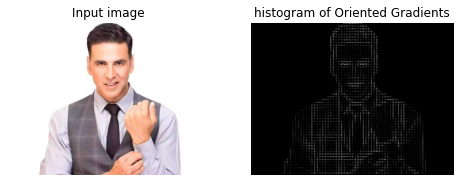

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2 

# read image form disk ################# Modify
#image = cv2.imread("Akshay_kumar")
# image = cv2.cvtcolor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread('Akshay_Kumar.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)




#imaage = cv2.cvtcolor(image, cv2.COLOR_BGR2RGB)
#image = cv2.cvtcolor(image, cv2.COLOR_BGR2GRAY)


fd, hog_image = hog(image,orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(1,1), visualize=True, multichannel=True)


fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)


ax1.axis("off")
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')


hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('histogram of Oriented Gradients')
plt.show()

In [ ]:
len(fd)

33600

In [ ]:
image.shape

(900, 1200, 3)

Face Dectection

In [ ]:
import face_recognition

import matplotlib.pyplot as plt
import matplotlib.patches as Rectangle
import matplotlib.patches as Circle
import numpy as np
import cv2 
%matplotlib inline

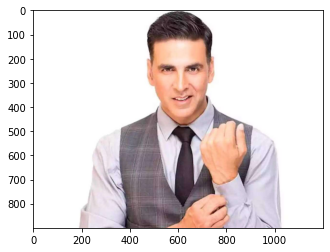

In [ ]:
#image = face_recognition.load_image_file('/content/Akshay kumar.jpg')
image =cv2.imread("Akshay_Kumar.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Face location

In [ ]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found{} face(s) in input image.".format(number_of_faces))

Found1 face(s) in input image.


A face is located at pixel location Top468, left171, Bottom735, Right:439


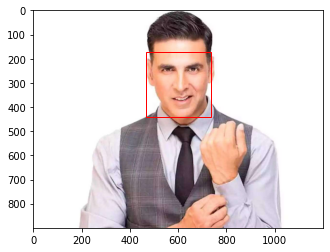

In [ ]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:


  top,right,bottom,left=face_location
  x,y,w,h = left,top,right,bottom
  print("A face is located at pixel location Top{}, left{}, Bottom{}, Right:{}".format(x,y,w,h))

  rect = Rectangle((x,y), w-x, h-y,fill=False,color="red")
  ax.add_patch(rect)

plt.show()

In [ ]:

import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [ ]:
#face_demo face_recognition.load_image("person_1.jpg")
image = cv2.imread('Akshay_Kumar.jpg')
face_demo = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#Clooney = facefac_regonition.load_image("person_2.jpg")
image = cv2.imread("mahesh_babu.jpg")
clooney = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread("indian-_ady.jpg")
lady = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
clooney_encoding = face_recognition.face_encodings(clooney)[0]
lady_encoding = face_recognition.face_encodings(lady)[0]


known_face_encodings = [
                      face_demo_encoding
                      ,clooney_encoding,
                      lady_encoding
]

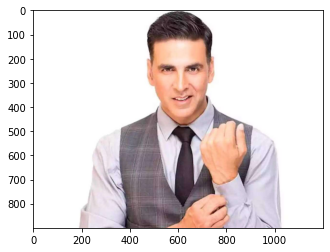

In [ ]:
#unknown_image = face_regonition.load_image_file("unknown_image")
image = cv2.imread('Akshay_Kumar.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)


unknown_face_encodings = face_recognition.face_encodings(unknown_image)
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:

   #results = face_recognition.compare_face(known_face_encoding,unknown_face_encoding,tolerance=0.6)

   #compute euclidean diatance (alternatively,use above code for one-line)
   results = []
   for known_face_encoding in known_face_encodings:
     d = distance.euclidean(known_face_encoding, unknown_face_encoding)
     #print("Euclidean distance:",d)
     results.append(d)
   threshold=0.6
   results = np.array(results) <= threshold

   name = 'Unknown'

   if results[0]:
       name = "Face demo image"
   elif results[1]:
        name = "clooney"
   elif results[2]:
        name = "xyz"

   print(f"found{name} in the photo!")
      

foundFace demo image in the photo!


Face landmarks

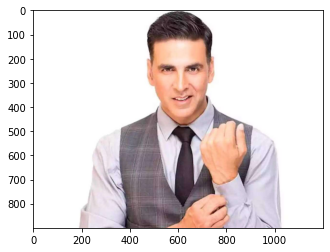

In [ ]:
#face_landmarks_list = face_recognition_load_image_file()
image = cv2.imread("Akshay_Kumar.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)


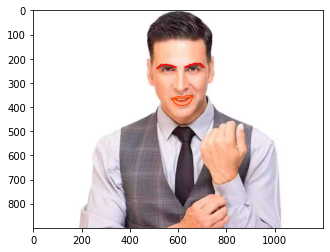

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
  # the facelandmark detection model returns these features:
  # - chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye, right_eye, top_lip,bottom_lip


  # Draw a line over the eyebrowes
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    #cv2.line(image, (pre_x,pre_y),(x,y),color,thinkness)
    l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
    ax.add_line(l)
    pre_x, pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:  
    #cv2.line(image,(pre_x,pre_y),(x,y),color,thinckness)
    l = mlines.Line2D([pre_x,x],[pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y = x, y

  p = Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(p)


plt.show()